# COGS 108 - Final Project 

# Overview

The background of the  Spotify Tracks Database contains the songs related features including genre, artist, track, id, popularity and  so on. Each song in the Spotify database has a unique ID. We can apply the features such as genre and popularity to predict the popularity of a song based on its genre, and we can predict how is the popularity of a song being related to the singer. We can even combine multiple characteristics of a song to predict whether a song with certain crucial features will be most likely to be popular in the features. 
The database we chose is newly updated in 2019 March, so very few online projects applied this database yet, but we can find some other Spotify database in previous years and applied the ideas from those database related projects.

 This data is extremely useful for artists or producers that are looking to create the next “hit” song.  By utilizing the given data, they can possibly predict what the next “hit” song will be by analyzing the data of song features and determining if there is a correlation.  We can apply the features such as genre and popularity to predict the popularity of a song based on its genre, and we can predict how is the popularity of a song being related to the artist. We can even combine multiple features of a song to predict whether a song with certain crucial features will be most likely to be popular in the features. We want to discover the specific song features that all top charting songs share, if there are any.  We will look at specifically chosen song features to see if there is a correlation between songs sharing similar features that are in the top charts.  If our hypothesis is correct, it will show that songs in music top charts share similar song features.  Thus, this will lead us to be able to predict the next “hit” song. 




# Names

-Yu Shen: set up, Data Cleaning, Model Training, Data Analysis & Results

-Zhaokai Xu: set up, Data Cleaning, Model Training, Visualization 

-Iris Peng: Research question, ethics and privacy, analysis

-Anthony Martinez: Background, Introduction, analysis

-Jingwen Chen: Hypothesis, conclusion, analysis


# Group Members IDs

- A13496628
- A14738474
- A13696093
- A14774741
- A13378551

# Research Question


Output target: song_popularity 

Q1. Do popular songs have similar attributes? If so, what are these attributes? Specifically, out of a chosen 13 attributes (song duration, tempo, key, etc.), are there similarities between them that determine a song’s popularity? 

Q2. Furthermore, after identifying these attributes, can we use them to predict which song will be most popular next? 	



## Background and Prior Work

Music is a huge component of the history and culture of mankind.  More recently, music has evolved into a business.  Artists are constantly competing for the top spots on music charts.  Whether it is for top song or top album.  Being highly ranked in these charts is important for artists because it will lead to more endorsements, more recognition, and most importantly, more record and song sales.  Now, creating a song that makes it on the top charts doesn’t necessarily mean that it was composed by Mozart.  Most popular songs have a familiar sound.  Upbeat, fast, and loud are good indicators of what could possibly be a popular song.  Creating a popular song doesn’t necessarily mean that you will make it on the top charts, but it does give you a better chance at it.  Now, streaming is the future of music.Streaming services like Apple Music and Spotify are releasing very useful data on current music.  More specifically, Spotify releases data on the song features for each song.  There are 13 total song features that Spotify releases to the public including: tempo, time signature, loudness, danceability, and more. 

In other Spotify related projects such as, https://www.kaggle.com/nadintamer/top-tracks-of-2017  
It raises interesting questions to explore the dataset such as 
Looking for patterns in the audio features of the songs. Why do people stream these songs the most?
How can we predict one audio feature based on the others features 
Explore which features correlate the most
https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking
Can you predict what is the rank position or the number of streams a song will have in the future?
What are the signs of a song that gets into the top rank to stay?
Do continents share same top ranking artists or songs?
Are people listening to the very same top ranking songs on countries far away from each other?
Other projects builders mostly applied machine learning regression models and classification models to make predictions, and the most popular library they referred to is Sklearn. They realized that the data preprocessing is crucial to the success of the projects, and feeding balanced data into the model they applied greatly contributes to improve the accurate prediction.These are the things we can be careful about while working on our project.
Since the dataset we are using contains different features compared to the other Spotify dataset, we suggest to try to take the best advantage of our unique features and raise some interesting exploration.
References (include links):
- 1) https://www.kaggle.com/nadintamer/top-tracks-of-2017  
- 2) https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking

# Hypothesis


Among the 14 features we have, 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', u'playlist, we want to analyze what feature would contribute the most to the popularity of a song. 

Intuitively, we will make the hypothesis that dancebility, livenesss, tempo and energy are key factors of a song_popularity

# Dataset(s)

- Dataset Name:19000 Spotify Songs 
- Link to the dataset: https://www.kaggle.com/edalrami/19000-spotify-songs

- Number of observations:19000

This dataset uses Spotify API and contains data of 19000 songs. It has 15 features, including ：song_name, song_popularity,song_duration_ms, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence.  It has a relatively large amount of samples which is the main reason we chose this dataset. All these audio features come from Spotify API and the data set is updated 5 months ago.

# Setup and data pre-analyzing

In [28]:
%matplotlib inline

#These are the packages that we 
#needed to import for the rest of our code. 
#Some of the packages that we needed 
#to use include the typical pandas,
#numpy, and matplot packages for
#data manipulation and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, norm
import seaborn as sns;

from sklearn.model_selection import train_test_split  
from sklearn.utils import shuffle


In [29]:
# 1.1 read data 

song_data_df = pd.read_csv("song_data.csv")

song_info_df = pd.read_csv("song_info.csv")

In [30]:
# 1.2 preview data
song_data_df.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [31]:
song_info_df.head(5)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [32]:
song_data_df = song_data_df.set_index('song_name')
song_info_df = song_info_df.set_index('song_name')

The reason we set the song_name as the index is: 
1. we do not want to treat it as a feature; 
2. using it as index allow us to combine two dataframe by index. 

In [33]:
song_data_df.shape

(18835, 14)

In [34]:
song_info_df.shape

(18835, 3)

In [35]:
# 1.3 combine the two dataset into df
df = pd.concat([song_data_df, song_info_df], axis=1)
df.shape

(18835, 17)

In [36]:
df.head(5)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
song_name,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


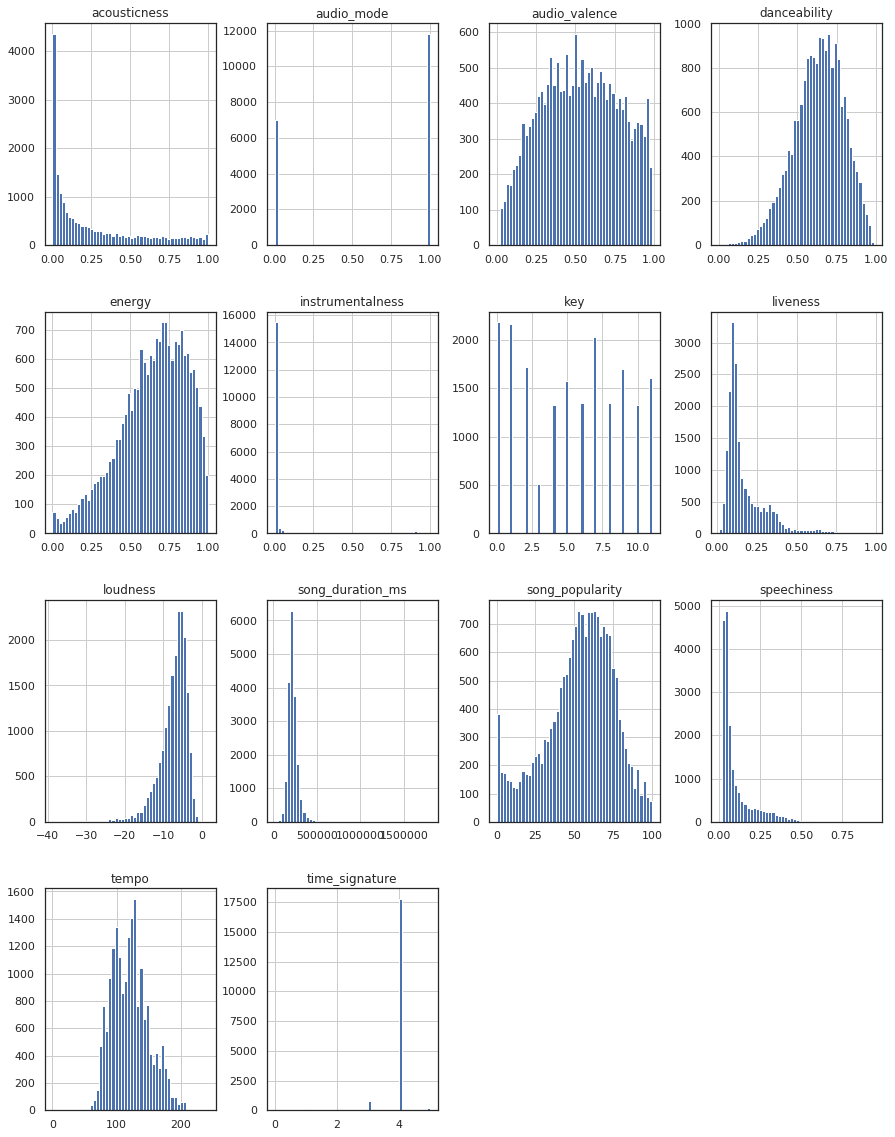

In [37]:
# 1.4 print distribution alongside all features
hist = df.hist(bins = 50,figsize = (15,20))

Print distribution alongside all features). Above are histograms of all the different features of the songs, including the song popularity after the song data and information has been combined into a single dataframe. Ad

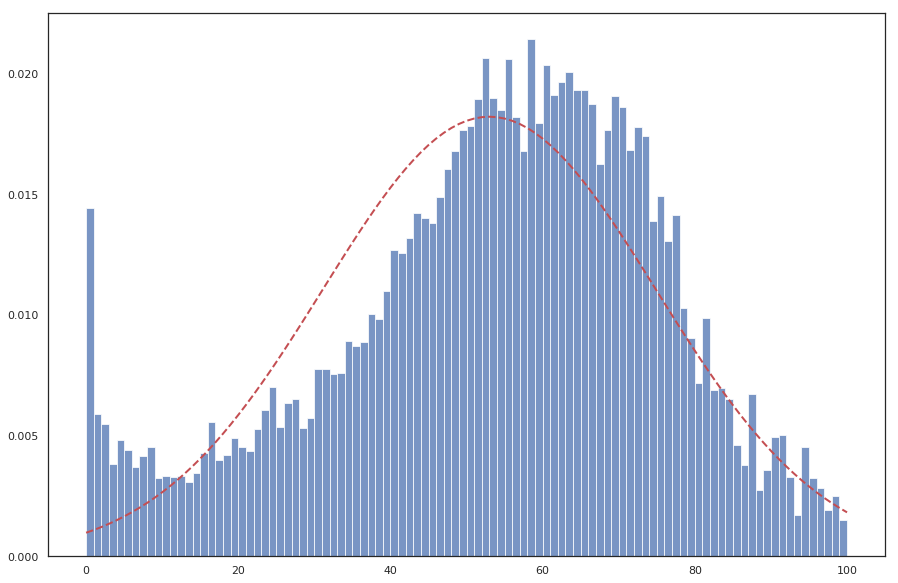

In [38]:
song_popularity = df['song_popularity'].tolist()
# find stats of song__popularity: mean and standard deviation
mu, sd = norm.fit(song_popularity)

#draw the histogram of the target
plt.subplots(figsize=(15,10))
n, bins, patches = plt.hist(song_popularity, bins = 100,density = 1,alpha = 0.75)

#draw the distribution function curve 
y =stats.norm.pdf( bins, mu, sd)
curve = plt.plot(bins, y, 'r--', linewidth=2)
plt.show()

We could find that most of the songs have popularity around 40-80, this matches the normal distribution. 
We have also observed that there are many songs have no popularity, so we should drop that part of songs. 


# Data Cleaning

### 2.1 drop potential useless features: 

In [42]:
df = df.drop(['album_names'], axis=1)
df = df.drop(['artist_name'], axis=1)
df = df[df.song_popularity != 0]
df.shape

(18563, 15)

We drop these two features because they all have unique values, which cannot be treated as a meaning feature. Therefore we dropped them. 
We also drop all the song that has no popularity. 

### 2.2 one hot encoding the playlist

In [43]:
newdf = pd.get_dummies(df,prefix=['playlist'])

In [44]:
newdf.head(5)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,...,playlist_Weekend Hangouts,playlist_Wild Cards_ Winter Mix,playlist_Women of Pop,playlist_Workday_ Pop,playlist_Workout Groove,playlist_Workout Twerkout,playlist_You & Me,playlist_Young & Free,playlist_Your Favorite Coffeehouse,playlist_mint
song_name,,,,,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,...,0,0,0,0,0,0,0,0,0,0
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,...,0,0,0,0,0,0,0,0,0,0
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,...,0,0,0,0,0,0,0,0,0,0
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,...,0,0,0,0,0,0,0,0,0,0
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,...,0,0,0,0,0,0,0,0,0,0


After one-hot encoding, we have 313 features, 300 of which are one-hot encoded of different playlists, since we have 300 different playlists in the dataset. 

### 2.3 analyze data relevance 

In [45]:
len(df['playlist'].unique())

300

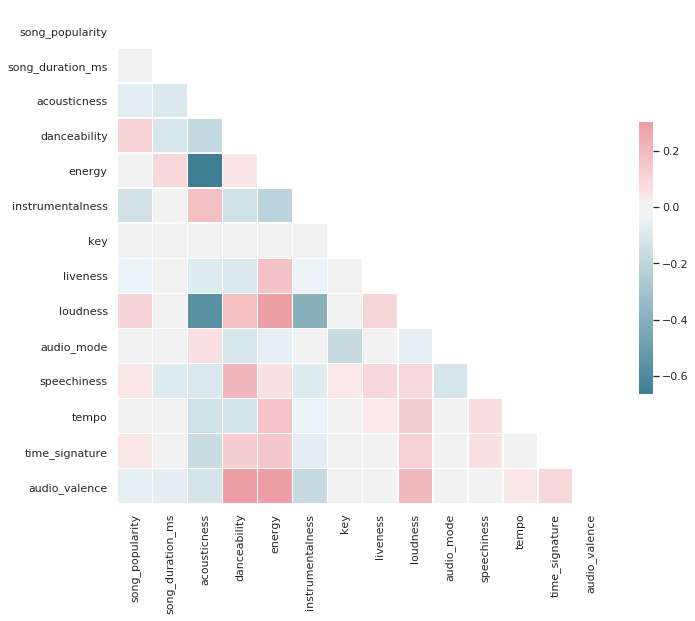

In [46]:
# analyze correlation 
# in range [-1,1], -1 means negtively correlated, 1 means positively correlated,0 means no relation

# analyze the correlation corresponding to popularity 


sns.set(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
d = pd.DataFrame(data=df,columns=list(df.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


For this section, we are analyzing the correlation between song features.  We are using a range of -1 to 1 to measure the correlation.  Any negative number means that there is a negative correlation and any positive number means that there is a positive correlation. The correlation of each feature will be calculated relating to popularity. In this instance, we use a heatmap to see what is more positively correlated with popularity.  We use a heat map because it allows us to easily see the features and how they are correlated with popularity. The more pink the color, the more correlated the feature is to popularity. When looking at the heatmap, we can see that loudness, danceability, and energy are most positively correlated with popularity.  Similarly, acousticness is the least correlated with popularity. 

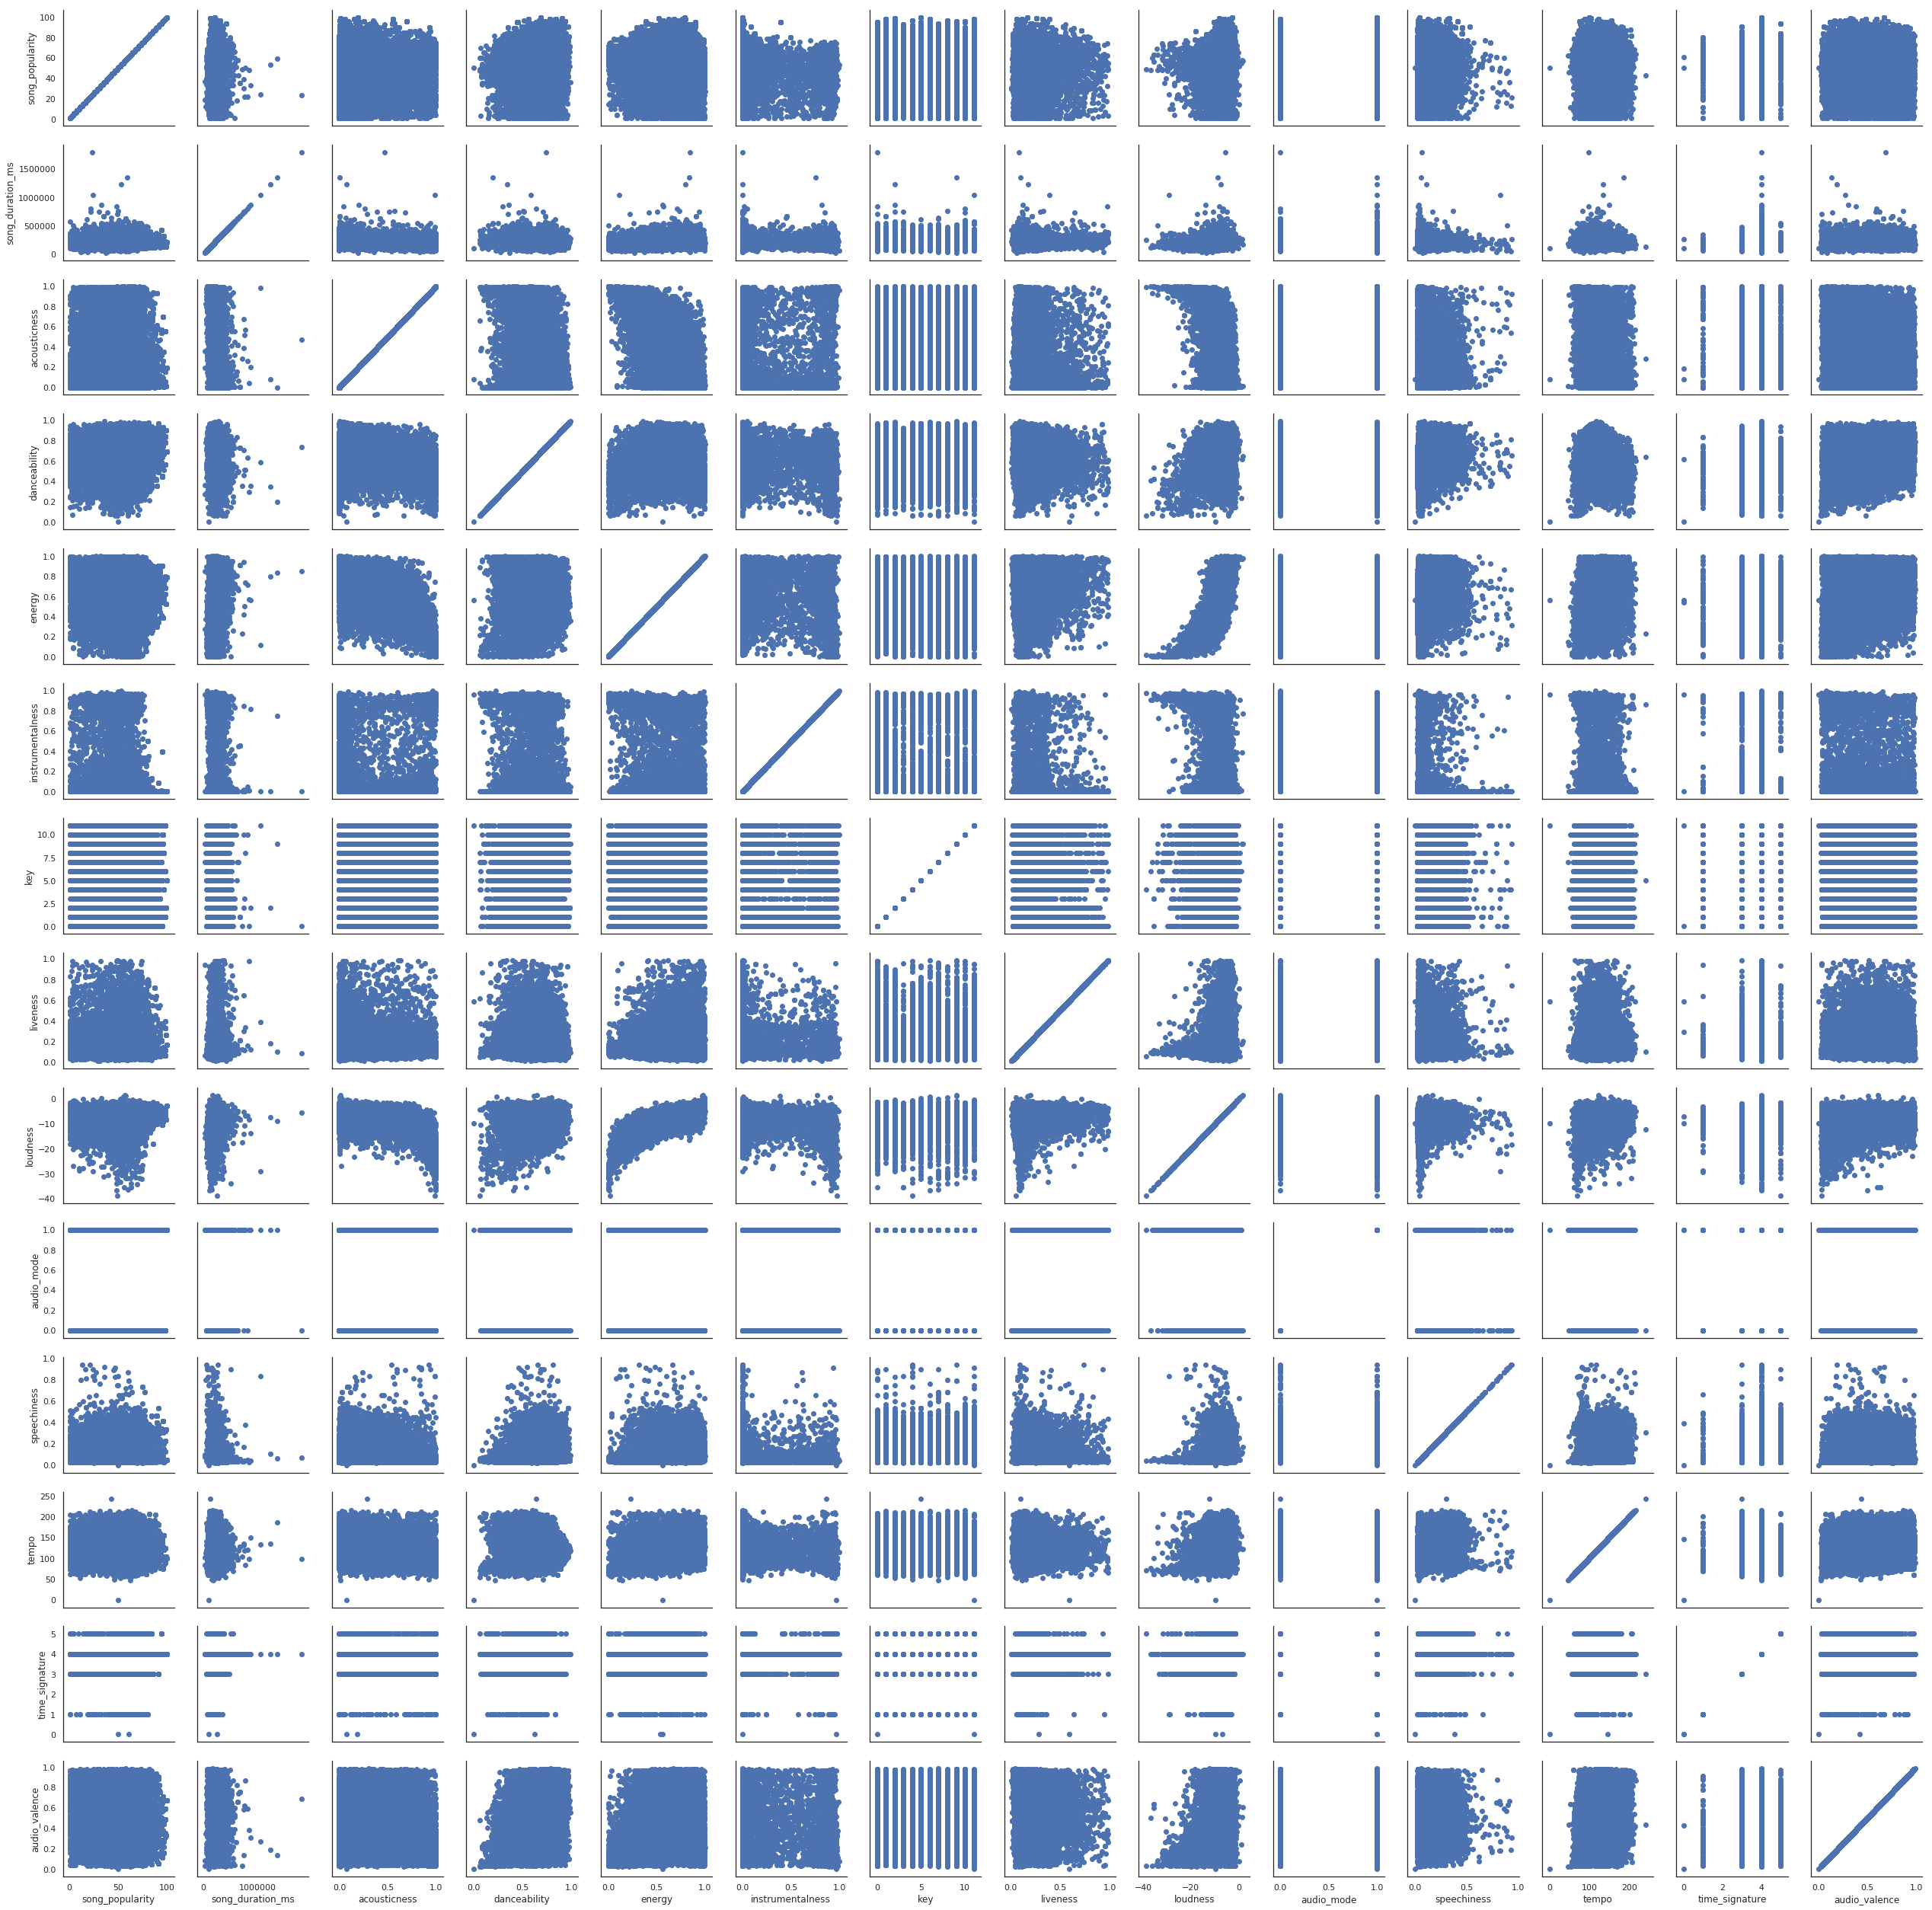

In [47]:
# This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 
# Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, 
# and the the marginal distribution of each variable can be shown on the diagonal.

g = sns.PairGrid(df)
g = g.map(plt.scatter)

        We have observed that some features are not affected by other feature at all, for example, song_popularity has no effect on audio_mode. Vice versa, we could use this graph to rule out some factors that have no effect on song_popularity, here it is key, audio_mode and time_signature. 

In [ ]:
# print the corr matrix for later filtering use
corr = df.corr()
corr.style.background_gradient()

Here, we run the correlation function, to observe the correlation between two features. It returns a value from -1 to 1, representing how the two variables are related. 

Since the target is song_popularity, in the following step, we will drop the features that are not too relevant to song_popularity. We set the threshhold as 0.05. This means, if the correlation of a feature between song_popularity, is less than 0.05, we will drop it in the dataframe. 

In [48]:
# drop the features whose correlation is less than 0.05

dropIndex = corr[abs(corr['song_popularity'])<0.05].index
print(dropIndex)

for name in dropIndex:
    df = df.drop([name], axis=1)
    newdf = newdf.drop([name], axis=1)

newdf.head(5)

Index(['song_duration_ms', 'energy', 'key', 'liveness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature'],
      dtype='object')


,song_popularity,acousticness,danceability,instrumentalness,loudness,audio_valence,playlist_00s Rock Anthems,playlist_100% LatinX,playlist_2000s Smash Hits,playlist_50 Latin Classics,...,playlist_Weekend Hangouts,playlist_Wild Cards_ Winter Mix,playlist_Women of Pop,playlist_Workday_ Pop,playlist_Workout Groove,playlist_Workout Twerkout,playlist_You & Me,playlist_Young & Free,playlist_Your Favorite Coffeehouse,playlist_mint
song_name,,,,,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,-4.095,0.474,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
In The End,66,0.010300,0.542,0.000000,-6.407,0.370,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seven Nation Army,76,0.008170,0.737,0.447000,-7.828,0.324,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
By The Way,74,0.026400,0.451,0.003550,-4.938,0.198,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
How You Remind Me,56,0.000954,0.447,0.000000,-5.065,0.574,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
newdf.shape

(18563, 306)

In [50]:
### Data Wraggling

In [51]:
# separate the training and testing
X = df.drop(['song_popularity','playlist'], axis=1)
X = shuffle(X)
Y = df['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [52]:
print("X_train:",X_train.shape, "y_train",y_train.shape)
print("X_test:",X_test.shape, "y_test",y_test.shape)

X_train: (14850, 5) y_train (14850,)
X_test: (3713, 5) y_test (3713,)


In [53]:
X.head()

,acousticness,danceability,instrumentalness,loudness,audio_valence
song_name,,,,,
Stars,0.916,0.381,0.00142,-18.361,0.116
Trip,0.214,0.717,0.00000,-5.680,0.387
Mambo No. 5 (A Little Bit of...),0.107,0.607,0.00000,-6.849,0.901
Malo,0.431,0.429,0.00000,-3.716,0.468
How Will I Know,0.943,0.506,0.00000,-12.346,0.301


In [54]:
Y.head()

song_name
Boulevard of Broken Dreams    73
In The End                    66
Seven Nation Army             76
By The Way                    74
How You Remind Me             56
Name: song_popularity, dtype: int64

# Train the model

## 3.1 train a parametric model 

#### Benefits of Parametric Machine Learning Algorithms:

Simpler: These methods are easier to understand and interpret results.
Speed: Parametric models are very fast to learn from data.
Less Data: They do not require as much training data and can work well even if the fit to the data is not perfect.
Limitations of Parametric Machine Learning Algorithms:

##### Constrained: By choosing a functional form these methods are highly constrained to the specified form.
Limited Complexity: The methods are more suited to simpler problems.
Poor Fit: In practice the methods are unlikely to match the underlying mapping function.


### Multi-Variable Linear Regression

statsmodels.regression.linear_model.OLS

In [75]:
# set song_popularity to be predicted value y
# set (acousticness	 danceability	instrumentalness	loudness	audio_valence	playlist) to be X

# Note the difference in argument order
model = sm.OLS(np.asarray(y_train), np.asarray(X_train)).fit()
y_pred = model.predict(np.asarray(X_test)) # make the predictions by the model

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:08:05   Log-Likelihood:                -67905.
No. Observations:               14850   AIC:                         1.358e+05
Df Residuals:                   14845   BIC:                         1.359e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9243      0.807      3.626      0.000       1.343       4.505
x2            53.0726      0.873     60.822      0.000      51.362      54.783
x3            -0.5717      0.958     -0.597      0.551      -2.450       1.307
x4            -1.4304      0.059    -24.258      0.000      -1.546      -1.315
x5            12.9436      0.822     15.754      0.000      11.333      14.554
==============================================================================
Omnibus:                      209.160   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.512
Skew:                          -0.294   Prob(JB):                     5.86e-48
Kurtosis:                       2.930   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model training summary, we could obeserve that the 95% confidence interval for the 5 parameters trained. 

In [77]:
#print('params', model.params)
print('tvalues',model.tvalues)

print("The model is:","\n song_popularity = ", model.params[0],"*acousticness","\n",
     model.params[1],"*danceability",model.params[2],"*instrumentalness","\n",
      model.params[3],"*loudness",model.params[4],"*audio_valence")

tvalues [  3.62567816  60.8221414   -0.59652797 -24.25816397  15.75411583]
The model is: 
 song_popularity =  2.92429180428 *acousticness 
 53.0726101337 *danceability -0.57166234799 *instrumentalness 
 -1.43042645297 *loudness 12.9435509189 *audio_valence


In [78]:
#visualize the result 
df_reg = pd.DataFrame( y_test.values, columns = ['actual_song_popularity'], index=y_test.index)
df_reg['predict_song_popularity'] = y_pred
df_reg

,actual_song_popularity,predict_song_popularity
song_name,,
"Out My Way/ Around You (feat. Marr Grey, RELLA, July 7 & Devin Tracy)",44,56.022159
You Can Cry,72,40.938954
My Number,72,53.992895
Once I Loved,59,63.931513
Have Love Will Travel,55,56.847152
Macarena,62,61.772959
IDGAF,89,61.841387
Worst Comes To Worst - Edited,53,58.209548
When I Come Around,74,30.282736


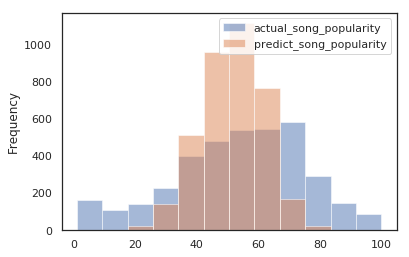

In [79]:
# to view the distribution difference
ax = df_reg.plot.hist(bins=12, alpha=0.5)

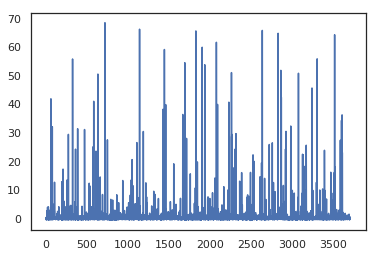

In [115]:
#loss
loss_ratio = (df_reg.predict_song_popularity - df_reg.actual_song_popularity)/df_reg.actual_song_popularity
index = range(len(loss))
plt.plot(index,loss)

# Data Analysis & Results

### Feature Analysis: 

1. Distribution:
We print distribution alongside all features. We print the histograms of all the different features of the songs, including the song popularity after the song data and information has been combined into a single dataframe. Additionally, we have a histogram of the song popularity compared to the normal curve to get an initial idea of what the data looks like before any data cleaning and manipulation. Histograms are appropriate here because we are able to compare large quantities of songs against certain dimensions that we care about.

2. Relevance: 
For this section, we are analyzing the correlation between song features.  We are using a range of -1 to 1 to measure the correlation.  Any negative number means that there is a negative correlation and any positive number means that there is a positive correlation. The correlation of each feature will be calculated relating to popularity. In this instance, we use a heatmap to see what is more positively correlated with popularity.  We use a heat map because it allows us to easily see the features and how they are correlated with popularity. The more pink the color, the more correlated the feature is to popularity. When looking at the heatmap, we can see that loudness, danceability, and energy are most positively correlated with popularity.  Similarly, acousticness is the least correlated with popularity. 


###  Data Cleaning

For data cleaning, we started by filtering to only the song features that we care about. This essentially meant dropping the ‘album_names’ and ‘artist_name’. Then, we assigned one-hot encoding to the features, encoding 300 of them in order to help us with the prediction part later. 

We also use the result from the previous observation of statistics, to rule out several factors. After observed the pair-grid map, we decided to rule out time_signature and audio_mode and key. 
 
 Most significantly, we print the relevance, and rule out every factors that is has less that 0.05 with our target song_popularity. 

### Result

We measure the loss as : pred-actual / actual, as a ratio. According to the loss of OLS linear model, we observe that this model is not as accurate as we thought. 

Some of the predict_song_popularity were much more greater than the actual, and some of the predict_song_popularity were huge less than the actual, which mean the result model is polarizing while compare the actual song’s popularity.

# Ethics & Privacy

We took our data from kaggle.com, which is a public database made specifically for data science work. We’ve only used and analyzed retrieved from the site, so permissions of use and privacy concerns have already been filtered by the site prior to use.

Because we took our data from the site, there are limitations to our analysis that stem from this. For instance, we can only analyze and use the song features that were listed in the song. However, by carefully choosing features that best characterize songs, we can still derive a close approximation. Another bias we should be mindful of in our analysis is that certain songs may be more similar to another because they are of the same genre. In this case, finding more salient features of the song such as tempo to be similar would be redundant. We can mitigate this issue, however, by also analyzing other features of the song that are not homogeneous across those of the same genre.

Additionally, although the usage of data may not have been an issue, we should still be considerate of the potential issues with distribution of the conclusions drawn from the data. For instance, that this information won’t result in an abusive inclusion of the features in hopes of gaining more popularity in a song. Although we, personally, may not use it for unethical marketing purposes, we should still try to ensure that such a thing may not happen.


# Conclusion & Discussion

Q1. Do popular songs have similar attributes?
Yes, they do have similar attributes. 
After dropping attributes that have low relevance with song_popularity, we got the rest factors: 

Q2. If popular songs do have similar attributes, can we predict what song will be the next “hit”?
We have obtained a model based on the datasets. However the test accuracy was not really high. 

Even through our model did not have the higher accuracy to shows verify our hypothesis, but by the work we have done, we are still believe that the popular songs have the similar attributes. Because after clean the data with dropping the low relevance attribution with song_popularity, we have attribution has the high relevance with the song_popularity: acousticness, danceability, instrumentalness, loudness, audio_valence.  
From the data we found, we make the prediction about the song’s popularity and also compare with the one in the data, which shows our prediction did not same as the popularity in the data, even not closing to it. From the graph shows the difference between the song’s popularity we predict and actual one, we can see the dipolar result in the predict and actual one. The way we work on should be the correct one but some detail we should not overlook make this failure. 



Future work
Since the model did not work as we except, which makes us to think is what are the attribution really affect the song popularity, are the every high relevance attribution affect the song popularity in the same weight? Is possible that some of high relevance attribution affect the song popularity more than other? And think deeper, does the attribution affect the song’s popularity change as time change? There are many and many different possibility  about attribution affect the songs popularity. We have much more to work on and to found the what exactly affect the song’s popularity.

## Reference: 
http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/

